In [1]:
import pandas as pd

df = pd.read_csv('titanic.csv')

In [2]:
inputs = df.drop(['Survived', 'Name', 'SibSp','Parch','Ticket','Cabin','Embarked', 'PassengerId'], axis='columns')
target = df['Survived']
inputs_r = inputs.round(2)

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le_sex = LabelEncoder()

inputs_r['sex_l'] = le_sex.fit_transform(df['Sex'])
inputs_n = inputs_r.drop(['Sex'], axis='columns')
inputs_n

,Pclass,Age,Fare,sex_l
0,3,22.0,7.25,1
1,1,38.0,71.28,0
2,3,26.0,7.92,0
3,1,35.0,53.10,0
4,3,35.0,8.05,1
...,...,...,...,...
886,2,27.0,13.00,1
887,1,19.0,30.00,0
888,3,NaN,23.45,0
889,1,26.0,30.00,1


In [5]:
import numpy as np

zero_not_accepted = ['Pclass', 'Age', 'Fare']

for column in zero_not_accepted:
  mean = int(inputs_n[column].mean(skipna=True))
  inputs_n[column] = inputs_n[column].replace(np.NaN, mean)


**Model training**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = inputs_n
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn import tree

In [9]:
model = tree.DecisionTreeClassifier()

In [10]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

**Model evaluation**

In [11]:
model.score(X_test, y_test)

0.8044692737430168

In [19]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[90, 18],
       [17, 54]])

Text(33.0, 0.5, 'Truth')

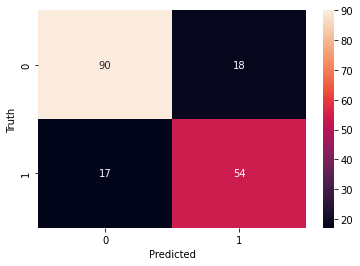

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')